## Recursive solution
##### TLE

In [1]:
class Solution:
    def minimumDeleteSum(self, s1: str, s2: str) -> int:
        return self.helper(s1, s2, 0, 0)

    def helper(self, s1, s2, i1, i2):
        del_str = 0
        if i1 == len(s1):
            while i2 < len(s2):
                del_str += ord(s2[i2])
                i2 += 1
            return del_str

        if i2 == len(s2):
            while i1 < len(s1):
                del_str  += ord(s1[i1])
                i1 += 1
            return del_str

        if s1[i1] == s2[i2]:
            return self.helper(s1, s2, i1+1, i2 +1)

        c1 = ord(s1[i1]) +  self.helper(s1, s2, i1 + 1, i2)
        c2 = ord(s2[i2]) + self.helper(s1, s2, i1, i2 +1)

        return min(c1, c2)

### Top down
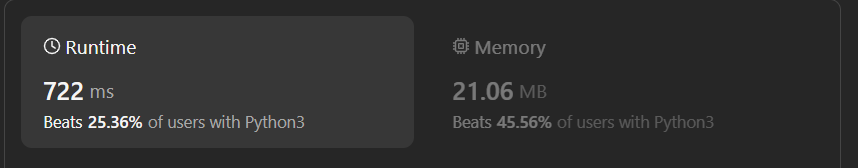

In [2]:
class Solution:
    def minimumDeleteSum(self, s1: str, s2: str) -> int:
        dp = [[-1 for _ in range(len(s2) + 1)] for _ in range(len(s1) + 1)]
        return self.helper(dp, s1, s2, 0, 0)

    def helper(self, dp, s1, s2, i1, i2):
        del_str = 0
        if i1 == len(s1):
            while i2 < len(s2):
                del_str += ord(s2[i2])
                i2 += 1
            return del_str

        if i2 == len(s2):
            while i1 < len(s1):
                del_str  += ord(s1[i1])
                i1 += 1
            return del_str

        if dp[i1][i2] == -1:
    
            if s1[i1] == s2[i2]:
                dp[i1][i2] = self.helper(dp, s1, s2, i1+1, i2 +1)
            else:
                c1 = ord(s1[i1]) +  self.helper(dp, s1, s2, i1 + 1, i2)
                c2 = ord(s2[i2]) + self.helper(dp, s1, s2, i1, i2 +1)
                dp[i1][i2] = min(c1, c2)

        return dp[i1][i2]

## Bottom up 
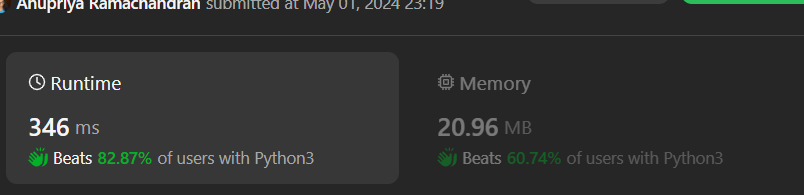

In [ ]:
class Solution:
    def minimumDeleteSum(self, s1: str, s2: str) -> int:
        n1, n2 = len(s1), len(s2)
        dp = [[0 for _ in range(len(s2) + 1)] for _ in range(len(s1) + 1)]

        for i in range(n1-1, -1, -1):
            dp[i][n2] = ord(s1[i]) + dp[i+1][n2]   

        for j in range(n2-1, -1, -1):
            dp[n1][j] = ord(s2[j]) + dp[n1][j+1]


        for i in range(n1-1, -1 , -1):
            for j in range(n2-1, -1, -1):
                if s1[i] == s2[j]:
                    dp[i][j] = dp[i+1][j +1]
                else:
                    c1 = ord(s1[i]) +  dp[i + 1][j]
                    c2 = ord(s2[j]) + dp[i][j + 1]
                    dp[i][j] = min(c1, c2)

        return dp[0][0]